<h1> TCC: MODELO MUNDELL-FLEMING-DORNBUSCH </h1>

<h3>Importando libraries</h3>

In [32]:
import scipy.linalg as la
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import random
import numpy.ma as ma

#print(plt.style.available)
#plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20

<h3>Função para calcular o ponto de longo prazo</h3>

In [2]:
def preco_lp(m, teta, i_ext, psi, y):
  plp = m +teta*i_ext - psi*y 
  return plp

def cambio_lp(b0, b1, p_exp, m, teta, i_ext, y, psi):
  clp = -(b0/b1) - p_ext +m +(teta + b2/b1)*i_ext + y*(-psi + 1/b1)
  return clp

Parâmetros iniciais do modelo

In [48]:
#parametros:

psi = 0.05 #0.05
teta = 0.6 #0.5
b1 = 25 #20
b2 = 0.2 #0.01
mi = 0.02 #0.01

#variaveis exogenas:

m0 = 100 #100
b0 = 400 #500
yn = 1000 #2000
i_ext = 3 #3
p_ext = 1 #0

#choque monetario

m1 = 101

#choque fiscal

b0_1 = 500

#variaveis de longo prazo

plp_m0 = preco_lp(m0, teta, i_ext, psi, yn)
clp_m0 = cambio_lp(b0, b1, p_ext, m0, teta, i_ext, yn, psi)


plp_m1 = preco_lp(m1, teta, i_ext, psi, yn)
clp_m1 = cambio_lp(b0, b1, p_ext, m1, teta, i_ext, yn, psi)

print(plp_m0, clp_m0)
print(plp_m1, clp_m1)

51.8 74.824
52.8 75.824


<h3>Calculando as linhas onde não há moviemento</h3>

In [6]:
#onde as diferenciais são zero


def p_zero(x_novo, b0, p_ext, b1, b2, teta, m, y_n, psi):
  p_zero = []
  for i in x_novo:
    s = -(b0/b1) - p_ext + i*(1+(b2/(b1*teta))) - (b2*m)/(b1*teta) + y_n*(1/b1 + (psi*b2)/(b1*teta) )
    p_zero.append(s)
  return p_zero

def s_zero(x_novo, m, b0, psi, b1, i_ext, teta, b2, p_ext):
  s_zero = []
  for i in x_novo:
    s = -p_ext + (m - b0*psi - i*(1 - psi*b1) + i_ext*(teta + psi*b2))/(psi*b1)
    s_zero.append(s)
  return s_zero


x_novo = np.arange(-100,100,4)

<h3>Plottando as curvas onde não há movimento e sua interseção</h3>

C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


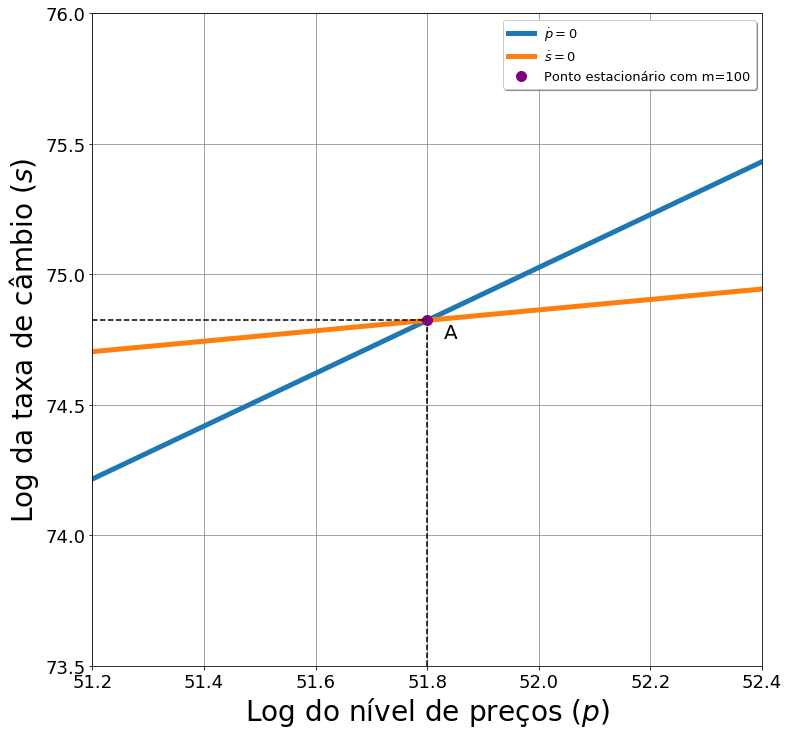

In [7]:
x = np.linspace(51.2, 52.5, 20)
y = np.linspace(73.5, 76, 20)

X, Y = np.meshgrid(x, y)

fig= plt.figure(figsize=(12,12))

plt.xlabel('Log do nível de preços ($p$)', fontsize=28)
plt.ylabel('Log da taxa de câmbio ($s$)', fontsize=28)

plt.grid(c='gray', linestyle='-', linewidth=0.7)
p_zerozada = p_zero(x_novo, b0, p_ext, b1, b2, teta, m0, yn, psi)
s_zerozada = s_zero(x_novo, m0, b0, psi, b1, i_ext, teta, b2, p_ext)
plt.plot(x_novo,p_zerozada, label="$\dot{p}=0$", linewidth=5)
plt.plot(x_novo,s_zerozada, label="$\dot{s}=0$", linewidth=5)
plt.xlim([51.2, 52.4])
plt.ylim([73.5, 76])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title("Interseção das curvas $\dot{s}=0$ e $\dot{p} = 0$", fontsize=28, pad=30)
plt.plot(plp_m0, clp_m0, 'ro', markersize=10, label="Ponto estacionário com m=100", color='purple')
plt.axes().annotate("A", xy=(plp_m0+0.03, clp_m0-0.07), fontsize=20)

#linha tracejada horizontal até A
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m0+0.03,0.05))), clp_m0)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical até A

y_d = np.array(np.arange(73.5, clp_m0,0.05))
d_vector = np.full(len(np.arange(73.5, clp_m0,0.05)),plp_m0 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')

plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('s_0_p_0.png')

<h3>Calculando a mesma curva mas com o choque monetário </h3>

C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous

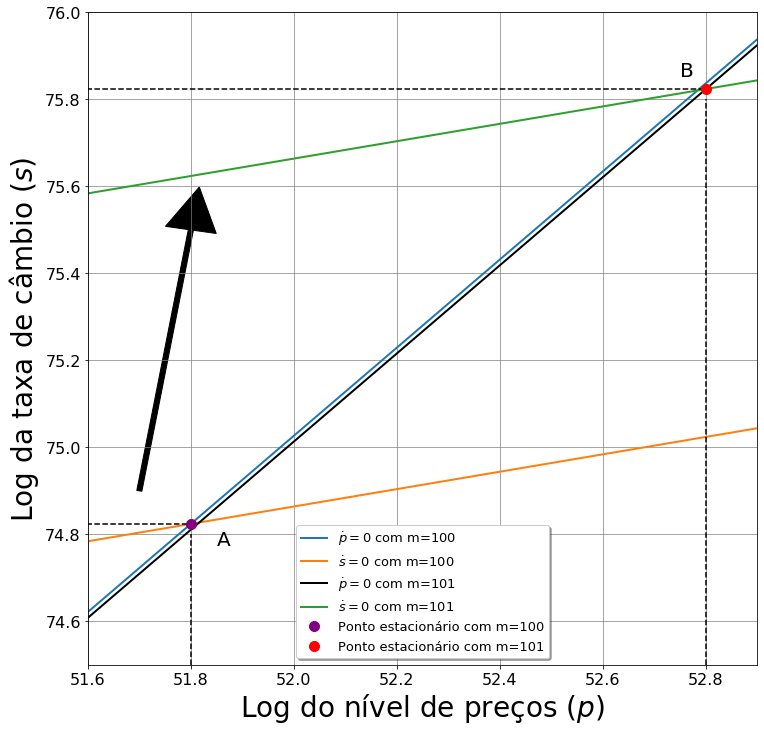

In [8]:
#fig, ax = plt.subplots()

x = np.linspace(51.2, 52.5, 20)
y = np.linspace(73.5, 76, 20)

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(12,12))

plt.xlabel('Log do nível de preços ($p$)', fontsize=28)
plt.ylabel('Log da taxa de câmbio ($s$)', fontsize=28)

plt.grid(c='grey', linestyle='-', linewidth=0.7)

p_zerozada = p_zero(x_novo, b0, p_ext, b1, b2, teta, m0, yn, psi)
s_zerozada = s_zero(x_novo, m0, b0, psi, b1, i_ext, teta, b2, p_ext)
plt.plot(x_novo,p_zerozada, label="$\dot{p}=0$ com m=100", linewidth=2)
plt.plot(x_novo,s_zerozada, label="$\dot{s}=0$ com m=100", linewidth=2)


p_zerozada_m1 = p_zero(x_novo, b0, p_ext, b1, b2, teta, m1, yn, psi)
s_zerozada_m1 = s_zero(x_novo, m1, b0, psi, b1, i_ext, teta, b2, p_ext)
plt.plot(x_novo,p_zerozada_m1, label="$\dot{p}=0$ com m=101", linewidth=2, color='black')
plt.plot(x_novo,s_zerozada_m1, label="$\dot{s}=0$ com m=101", linewidth=2)

plt.axes().arrow(51.7, 74.9, 0.1, 0.6,width=0.01, head_width=0.1, head_length=0.1, fc='k', ec='k')


#linha tracejada horizontal até A
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m0+0.03,0.05))), clp_m0)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical até A

y_d = np.array(np.arange(74.5, clp_m0,0.05))
d_vector = np.full(len(np.arange(74.5, clp_m0,0.05)),plp_m0 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')


#linha tracejada horizontal para B
x_d = np.array(np.arange(51.2, plp_m1+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m1+0.03,0.05))), clp_m1)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical até B

y_d = np.array(np.arange(74.5, clp_m1,0.05))
d_vector = np.full(len(np.arange(74.5, clp_m1,0.05)),plp_m1 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([51.6, 52.9])
plt.ylim([74.5, 76])
plt.axes().annotate("A", xy=(plp_m0+0.05, clp_m0-0.05), fontsize=20)
plt.axes().annotate("B", xy=(plp_m1-0.05, clp_m1+0.03), fontsize=20)

plt.plot(plp_m0, clp_m0, 'ro', markersize=10, label="Ponto estacionário com m=100", color='purple')
plt.plot(plp_m1, clp_m1, 'ro', markersize=10, label="Ponto estacionário com m=101")
plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('s_0_p_0_apos_expansao.png')

<h3>Calculando a variedade estável</h3>

In [14]:
def variedade_estavel(x_novo, clp, plp, eig,  teta):

  y_estavel = [] 
  for i in x_novo:
    #y = clp + (i/(teta * eig)) - plp/(teta * eig)
    y = clp + (i- plp)/(teta * eig)
    y_estavel.append(y)
  return y_estavel

def variedade_instavel(x_novo, clp, plp, eig,  teta):
  y_instavel = []
  for i in x_novo:
    y = clp + (i/(teta * eig)) - plp/(teta * eig)
    y_instavel.append(y)
  return y_instavel

def function(z, t, mi, b1, b2, teta, plp, clp):
    x, y = z

    dxdt = -mi*b1*x  - (mi*b2*x)*(1/teta) + mi*b1*y + mi*b1*plp  + (mi*b2*plp)*(1/teta) - mi*b1*clp
    dydt = (x/teta) - (plp/teta)


    return [dxdt, dydt]

def overshooting(m0, m1, teta, eig, s):
  deriv = 1 - 1/(eig*teta)
  monet = m1 - m0
  final = s + deriv*monet
  return final


A = np.array([[-mi*(b1+b2/teta), mi*b1],[1/teta, 0]])
autocoisas = np.linalg.eig(A)
y_estavel_m0 = variedade_estavel(x_novo, clp_m0, plp_m0, autocoisas[0][0],  teta)
y_estavel_m1 = variedade_estavel(x_novo, clp_m1, plp_m1, autocoisas[0][0],  teta)

d = overshooting(m0, m1, teta, autocoisas[0][0], clp_m0)

<h3>Plottando o movimento da trajetória estável</h3>

C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previo

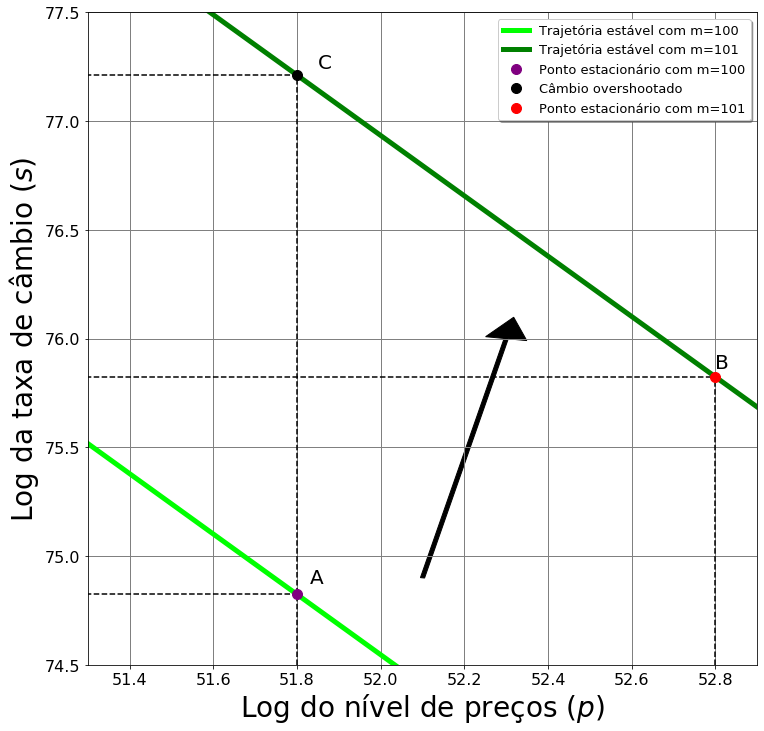

In [11]:
fig= plt.figure(figsize=(12,12))

plt.xlabel('Log do nível de preços ($p$)', fontsize=28)
plt.ylabel('Log da taxa de câmbio ($s$)', fontsize=28)


#seta
plt.axes().arrow(52.1, 74.9, 0.2, 1.1,width=0.01, head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.grid(c='gray', linestyle='-', linewidth=1)

#curvas antes da expansao
#p_zerozada = p_zero(x_novo, b0, p_ext, b1, b2, teta, m0, yn, psi)
#s_zerozada = s_zero(x_novo, m0, b0, psi, b1, i_ext, teta, b2, p_ext)
#plt.plot(x_novo,p_zerozada, label="$\dot{p}=0$ com m=100", linewidth=2)
#plt.plot(x_novo,s_zerozada, label="$\dot{s}=0$ com m=100", linewidth=2)
  
#curvas depois da expansao
#p_zerozada_m1 = p_zero(x_novo, b0, p_ext, b1, b2, teta, m1, yn, psi)
#s_zerozada_m1 = s_zero(x_novo, m1, b0, psi, b1, i_ext, teta, b2, p_ext)
#plt.plot(x_novo,p_zerozada_m1, label="$\dot{p}=0$ com m=101", linewidth=2)
#plt.plot(x_novo,s_zerozada_m1, label="$\dot{s}=0$ com m=101", linewidth=2)


#trajetorias estaveis
plt.plot(x_novo, y_estavel_m0, linewidth=5, color='lime', label='Trajetória estável com m=100')# % round(autocoisas[0][0],4)')      
plt.plot(x_novo, y_estavel_m1, linewidth=5, color='green', label='Trajetória estável com m=101')# % round(autocoisas[0][0],4))        

#plt.axes().arrow(51.7, 74.9, 0.01, 0.1, head_width=0.01, head_length=0.05, fc='k', ec='k')
#plt.axes().arrow(51.9, 74.9, 0.001, 0.5,width=0.001, head_width=0.001, head_length=0.001, fc='k', ec='k')


#tamanho dos numeros nos eixos
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.xlim([51.3, 52.9])
plt.ylim([74.5, 77.5])

#plt.axes().annotate("A", xy=(plp_m0+2, clp_m0+2))
#plt.axes().annotate("B", xy=(plp_m1, clp_m1))

#linha tracejada horizontal para C
d_vector = np.full((13), d)
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

#linha tracejada vertical para C  
y_d = np.array(np.arange(74.5, d,0.05))
d_vector = np.full(len(np.arange(74.5, d,0.05)),plp_m0 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')

#linha tracejada para B
x_d = np.array(np.arange(51.2, plp_m1+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m1+0.03,0.05))), clp_m1)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

y_d = np.array(np.arange(74.5, clp_m1,0.05))
d_vector = np.full(len(np.arange(74.5, clp_m1,0.05)),plp_m1 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')

#linha tracejada até A
x_d = np.array(np.arange(51.2, plp_m0+0.03,0.05))
d_vector = np.full((len(np.arange(51.2, plp_m0+0.03,0.05))), clp_m0)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

plt.axes().annotate("A", xy=(plp_m0+0.03, clp_m0+0.05), fontsize=20)
plt.axes().annotate("B", xy=(plp_m1, clp_m1+0.04), fontsize=20)
plt.axes().annotate("C", xy=(plp_m0+0.05, d+0.03), fontsize=20)
#plt.title("Trajetórias estáveis após a expansão monetária", fontsize=28, pad=30)
plt.plot(plp_m0, clp_m0, 'ro', markersize=10, label="Ponto estacionário com m=100", color='purple')
plt.plot(plp_m0, d, 'ro', markersize=10, label="Câmbio overshootado", color='black')
plt.plot(plp_m1, clp_m1, 'ro', markersize=10, label="Ponto estacionário com m=101", color='red')
plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('trajetorias_estaveis_apos_expansao.png')

<h3> Plotando o retrato de fase </h3>

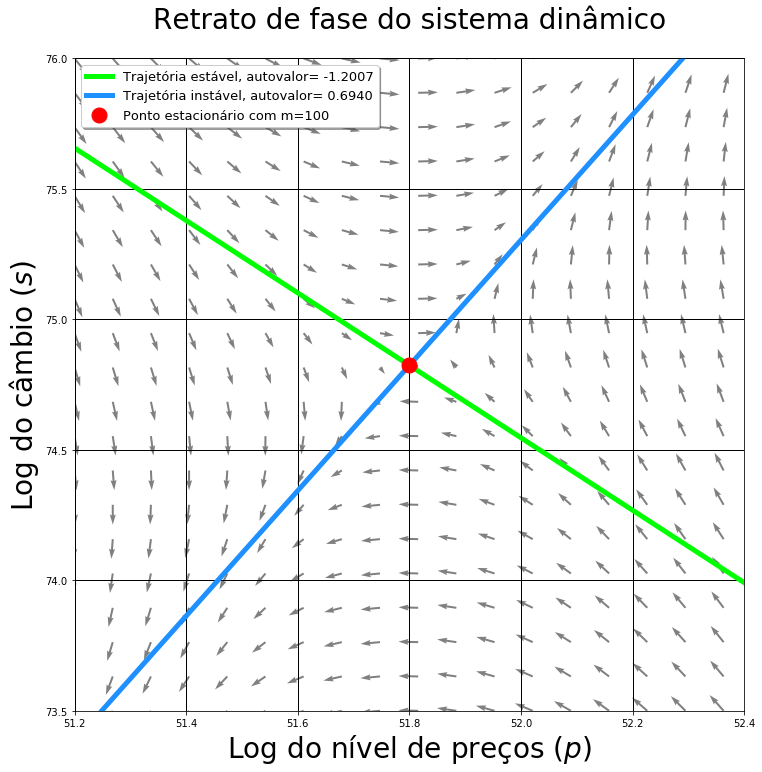

In [15]:
#x = np.linspace(0.7, 2.5, 100)
#y = np.linspace(76, 78, 100)

y_estavel = variedade_estavel(x_novo, clp_m0, plp_m0, autocoisas[0][0],  teta)
y_instavel = variedade_instavel(x_novo, clp_m0, plp_m0, autocoisas[0][1],  teta)

x = np.linspace(51.2, 52.5, 20)
y = np.linspace(73.5, 76, 20)

X, Y = np.meshgrid(x, y)

NI, NJ = X.shape 
u, v = np.zeros(X.shape), np.zeros(Y.shape)
t = 0

for i in range(NI):
    for j in range(NJ):
        x = X[i, j]
        y = Y[i, j]
        yprime = function([x, y],t, mi, b1, b2, teta, plp_m0, clp_m0)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]


fig= plt.figure(figsize=(12,12))

#Q = plt.quiver(X, Y, u, v, color='r')

u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);

Q = plt.quiver(X, Y,  u, v, color='gray', scale=None, scale_units='inches')
plt.xlabel('Log do nível de preços ($p$)', fontsize=28)
plt.ylabel('Log do câmbio ($s$)', fontsize=28)

plt.grid(c='black', linestyle='-', linewidth=1)

plt.plot(x_novo, y_estavel, linewidth=5, color='lime', label='Trajetória estável, autovalor= %.4f' % round(autocoisas[0][0],4))        #plotando o primeiro autovetor
plt.plot(x_novo, y_instavel,linewidth=5,color='dodgerblue', label='Trajetória instável, autovalor= %.4f' % round(autocoisas[0][1],4))      #plotando o segundo autovetor

#plt.plot(x_novo, y_zada, label='dx/dt = 0')        #onde a eq é zero
#plt.plot(x_novo, y_zada_2, label='dydx = 0')      #onde a eq é zero
plt.xlim([51.2, 52.4])
plt.ylim([73.5, 76])
plt.title("Retrato de fase do sistema dinâmico", fontsize=28, pad=30)
plt.plot(plp_m0, clp_m0, 'ro', markersize=15, label="Ponto estacionário com m=100")
#plt.xlim([0.7, 2.5])
#plt.ylim([76, 78])
plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('phase-portrait.png')

<h2> Caminho até o estado estacionário </h2>

<h3> Funções: </h3>

In [36]:
def s_trajetoria(t, eig, s_0, s_lp_novo, s_lp_old):
  trajetoria = []
  for i in t:
    if i <= 0:
      trajetoria.append(s_lp_old)
    elif i > 0:
      s = (s_0 - s_lp_novo)*math.exp(eig * i) + s_lp_novo
      trajetoria.append(s)
  return trajetoria

def p_trajetoria(t, eig, p_0, p_lp):
  trajetoria = []
  for i in t:
    if i <= 0:
      trajetoria.append(p_0)
    elif i > 0:
      p = (p_0 - p_lp)*math.exp(eig * i) + p_lp
      trajetoria.append(p)
  return trajetoria

def overshooting(m0, m1, teta, eig, s):
  deriv = 1 - 1/(eig*teta)
  monet = m1 - m0
  final = s + deriv*monet
  return final

def i_total(t, i_ext, eig, overshootado, clp):
  #derivando s(t)
  trajetoria = []
  for value in t:
    if value <= 0:
      trajetoria.append(i_ext)
    elif value > 0:
      i = eig*(overshootado - clp)*math.exp(eig*value) + i_ext
      trajetoria.append(i)
  return trajetoria

def ag_demand(t, b0, b1, s, p, p_ext, b2, i): #que estranho que funciona
  #equação 3.6
  trajetoria = []
  item = 0
  while item < len(t):
    y_d = b0 + b1*(s[item] - p[item] + p_ext) - b2*i[item]
    trajetoria.append(y_d)
    item += 1
  return trajetoria

<h3> Definindo o caminho </h3>

In [38]:
#t = np.linspace(0, 10, 1000)
cambio_overshootado = overshooting(m0, m1, teta, autocoisas[0][0], clp_m0)
s_caminho = s_trajetoria(t, autocoisas[0][0], cambio_overshootado, clp_m1, clp_m0)
p_caminho = p_trajetoria(t, autocoisas[0][0], plp_m0, plp_m1)

t1 = np.linspace(-2, 0, 500)
t2 = np.linspace(0, 5, 5000)
t = np.concatenate([t1, t2])

<h3> Caminho do câmbio e dos preços </h3>

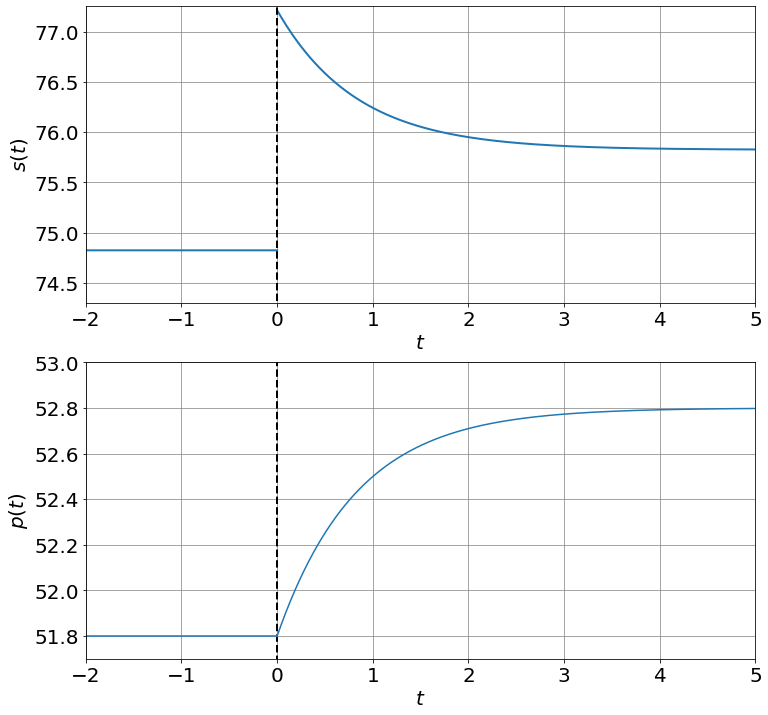

In [39]:
#plotando o cambio e o preco

fig, (ax1, ax2) = plt.subplots(2)


#plot do cambio
#plt.set_yticks(np.arange(min(s_caminho), max(s_caminho)+1, 0.5))
ax1.grid(c='grey', linestyle='-', linewidth= 0.7)
mask_start = len(t1)
mc_1 = ma.array(s_caminho)
mc_1[mask_start] = ma.masked


ax1.plot(t, mc_1, linewidth= 2)


y_d = np.array(np.arange(min(s_caminho)-0.5, max(s_caminho)+0.1,0.05))
d_vector = np.full(len(np.arange(min(s_caminho)-0.5, max(s_caminho)+0.1,0.05)),0 )
ax1.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)

ax1.set_xlim([-2, 5])
ax1.set_ylim([74.3, 77.25])
ax1.set_ylabel("$s(t)$", fontsize=20)
ax1.set_xlabel("$t$", fontsize=20)


#plot do preco

ax2.grid(c='grey', linestyle='-', linewidth= 0.7)

mask_start = len(t1)
mc_2 = ma.array(p_caminho)
mc_2[mask_start] = ma.masked
ax2.set_xlim([-2, 5])
ax2.set_ylim([51.7, 53])
y_d = np.array(np.arange(min(p_caminho)-0.5, max(p_caminho)+0.3,0.05))
d_vector = np.full(len(np.arange(min(p_caminho)-0.5, max(p_caminho)+0.3,0.05)),0 )
ax2.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)


ax2.plot(t, mc_2)
#plt.yticks(np.arange(min(p_caminho)-0.001, max(p_caminho)+1, 0.3))
#ax2.set_title("Log do nível de preços")
ax2.set_ylabel("$p(t)$", fontsize=20)
ax2.set_xlabel("$t$", fontsize=20)
plt.savefig('caminho_p_s.png')

<h3> Juro e demanda agregada </h3>

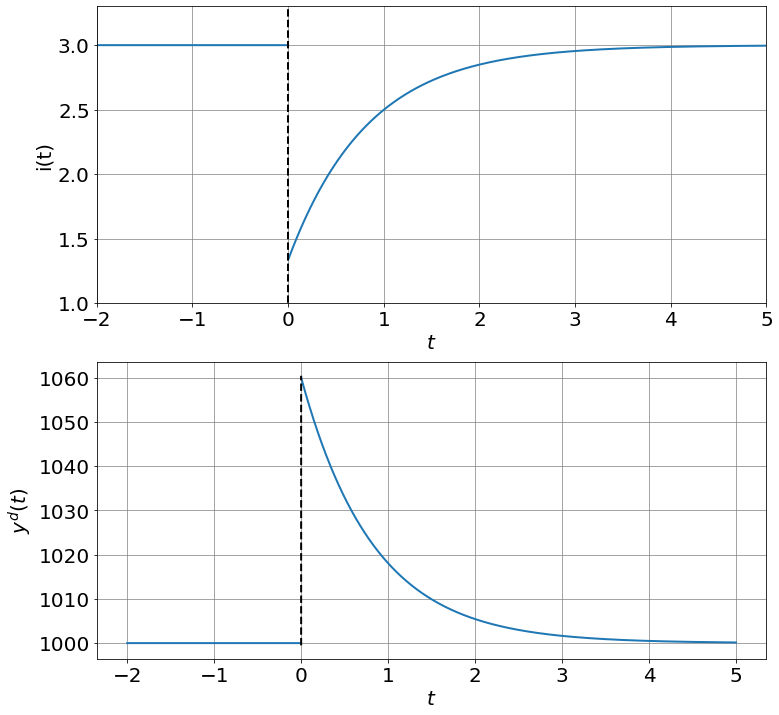

In [40]:
#plotando os juros e a demanda agregada


#taxa de juros


i_caminho = i_total(t, i_ext, autocoisas[0][0], overshooting(m0, m1, teta, autocoisas[0][0], clp_m0), clp_m1)

fig, (ax1, ax2) = plt.subplots(2)

ax1.grid(c='grey', linestyle='-', linewidth= 0.7)
mask_start = len(t1)
mc_1 = ma.array(i_caminho)
mc_1[mask_start] = ma.masked

ax1.plot(t, mc_1, linewidth= 2)

y_d = np.array(np.arange(min(i_caminho)-0.5, max(i_caminho)+0.5,0.05))
d_vector = np.full(len(np.arange(min(i_caminho)-0.5, max(i_caminho)+0.5,0.05)),0 )
ax1.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)

ax1.set_xlim([-2, 5])
ax1.set_ylim([1, 3.3])
ax1.set_ylabel("i(t)", fontsize=20)
ax1.set_xlabel("$t$", fontsize=20)

#demanda agregada

demanda_agregada = ag_demand(t, b0, b1, s_trajetoria(t, autocoisas[0][0], cambio_overshootado, clp_m1, clp_m0), 
                             p_trajetoria(t, autocoisas[0][0], plp_m0, plp_m1), 
                             p_ext, b2,
                             i_total(t, i_ext, autocoisas[0][0], overshooting(m0, m1, teta, autocoisas[0][0], clp_m0), clp_m1))

ax2.grid(c='grey', linestyle='-', linewidth= 0.7)
mask_start = len(t1)
mc_2 = ma.array(demanda_agregada)
mc_2[mask_start] = ma.masked

ax2.plot(t, mc_2, linewidth= 2)

y_d = np.array(np.arange(min(demanda_agregada)-0.5, max(demanda_agregada)+0.5,0.05))
d_vector = np.full(len(np.arange(min(demanda_agregada)-0.5, max(demanda_agregada)+0.5,0.05)),0 )
ax2.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)

ax2.set_ylabel("$y^d(t)$", fontsize=20)
ax2.set_xlabel("$t$", fontsize=20)

plt.savefig('juros_demanda.png')

<h2> VARIANDO PARÂMETROS </h2>

<h3> Variando Teta $(\theta)$ no câmbio </h3>

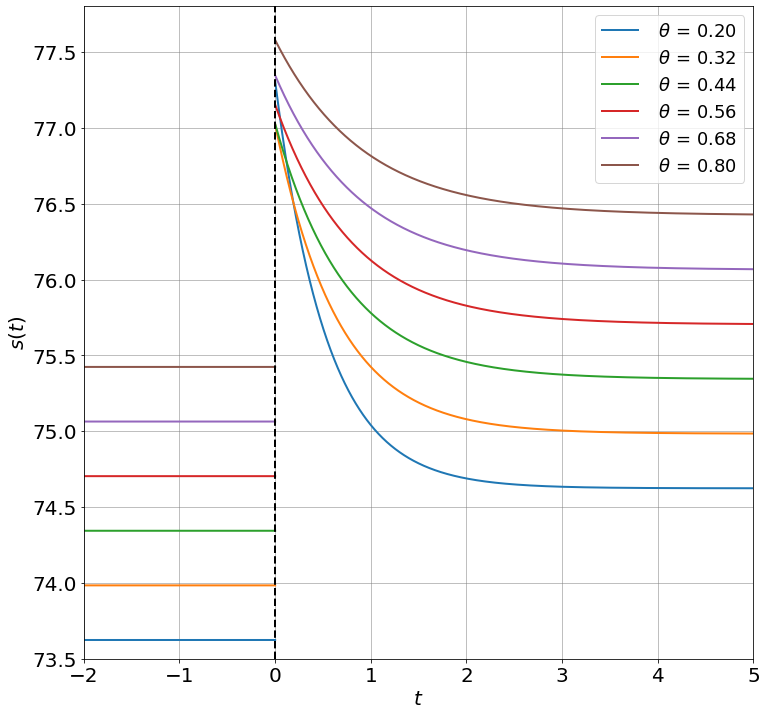

In [41]:
fig, ax = plt.subplots()
for n in np.linspace(0.2, 0.8, 6):
  mask_start = len(t1)
  mc_1 = ma.array(s_trajetoria(t, np.linalg.eig(np.array([[-mi*(b1+b2/n), mi*b1],[1/n, 0]]))[0][0], overshooting(m0, m1, n, np.linalg.eig(np.array([[-mi*(b1+b2/n), mi*b1],[1/n, 0]]))[0][0], cambio_lp(b0, b1, p_ext, m0, n, i_ext, yn, psi)), cambio_lp(b0, b1, p_ext, m1, n, i_ext, yn, psi), cambio_lp(b0, b1, p_ext, m0, n, i_ext, yn, psi)))
  mc_1[mask_start] = ma.masked
  ax.plot(t, mc_1 , label=" $\\theta$ = %.2f" % n, linewidth=2)

y_d = np.array(np.arange(73.5,78.1,0.5))
d_vector = np.full(len(np.arange(73.5,78.1,0.5)), 0)
plt.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)


plt.ylabel("$s(t)$", fontsize=20)
plt.xlabel("$t$", fontsize=20)


plt.xlim([-2, 5])
plt.ylim([73.5, 77.8])

ax.grid(c='grey', linestyle='-', linewidth= 0.5)
ax.legend(fontsize=18)

plt.savefig('variando_teta_cambio.png')

<h3> Variando Theta($\theta$) no preço </h3>

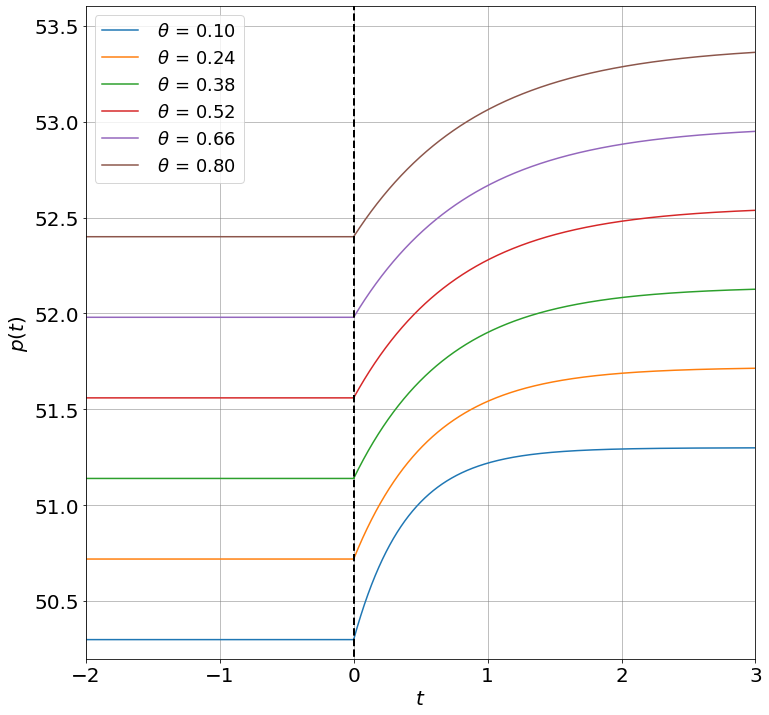

In [42]:
fig, ax = plt.subplots()
for n in np.linspace(0.1, 0.8, 6):
  # p_trajetoria(t, eig, p_0, p_lp):
  mask_start = len(t1)
  mc_1 = ma.array(p_trajetoria(t,np.linalg.eig(np.array([[-mi*(b1+b2/n), mi*b1],[1/n, 0]]))[0][0], preco_lp(m0, n, i_ext, psi, yn), preco_lp(m1, n, i_ext, psi, yn) ))
  mc_1[mask_start] = ma.masked
  ax.plot(t,mc_1 , label=" $\\theta$ = %.2f" % n)
  #ax.plot(t, s_trajetoria(t, np.linalg.eig(np.array([[-mi*(b1+b2/n), mi*b1],[1/n, 0]]))[0][0], overshooting(m0, m1, n, np.linalg.eig(np.array([[-mi*(b1+b2/n), mi*b1],[1/n, 0]]))[0][0], cambio_lp(b0, b1, p_ext, m0, n, i_ext, yn, psi)), cambio_lp(b0, b1, p_ext, m1, n, i_ext, yn, psi)), label=" Teta = %f" % n)

y_d = np.array(np.arange(50.1, 54.6,0.5))
d_vector = np.full(len(np.arange(50.1, 54.6,0.5)), 0)
plt.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)

ax.grid(c='grey', linestyle='-', linewidth= 0.5)
plt.xlim([-2, 3])
plt.ylim([50.2, 53.6])
ax.legend(fontsize=18)
plt.ylabel("$p(t)$", fontsize=20)
plt.xlabel("$t$", fontsize=20)
plt.savefig('variando_teta_precos.png')

<h3>Variando mi nos preços </h3>

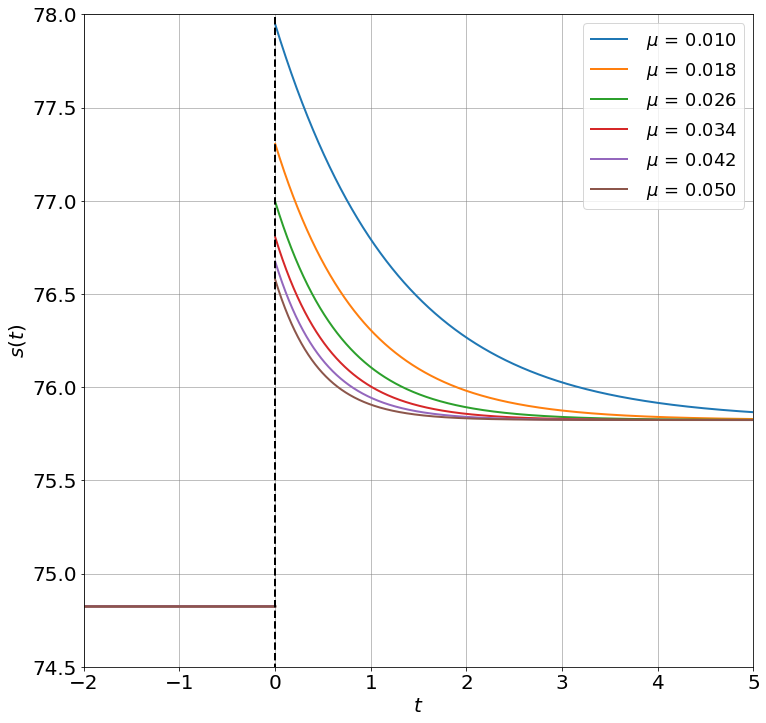

In [43]:
fig, ax = plt.subplots()
for n in np.linspace(0.01, 0.05, 6): 
                                      
  mask_start = len(t1)
  mc_1 = ma.array(s_trajetoria(t, np.linalg.eig(np.array([[-n*(b1+b2/teta), n*b1],[1/teta, 0]]))[0][0], overshooting(m0, m1, teta, np.linalg.eig(np.array([[-n*(b1+b2/teta), n*b1],[1/teta, 0]]))[0][0], cambio_lp(b0, b1, p_ext, m0, teta, i_ext, yn, psi)), cambio_lp(b0, b1, p_ext, m1, teta, i_ext, yn, psi), cambio_lp(b0, b1, p_ext, m0, teta, i_ext, yn, psi)))
  mc_1[mask_start] = ma.masked
  ax.plot(t, mc_1 , label=" $\\mu$ = %.3f" % n, linewidth=2)


y_d = np.array(np.arange(74, 79,0.5))
d_vector = np.full(len(y_d), 0)
plt.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)

ax.grid(c='grey', linestyle='-', linewidth= 0.5)
plt.xlim([-2, 5])
plt.ylim([74.5, 78])
ax.legend(fontsize=18)
plt.ylabel("$s(t)$", fontsize=20)
plt.xlabel("$t$", fontsize=20)
plt.savefig('variando_mi_cambio_meio.png')

<h3> Variando mi nos preços </h3>

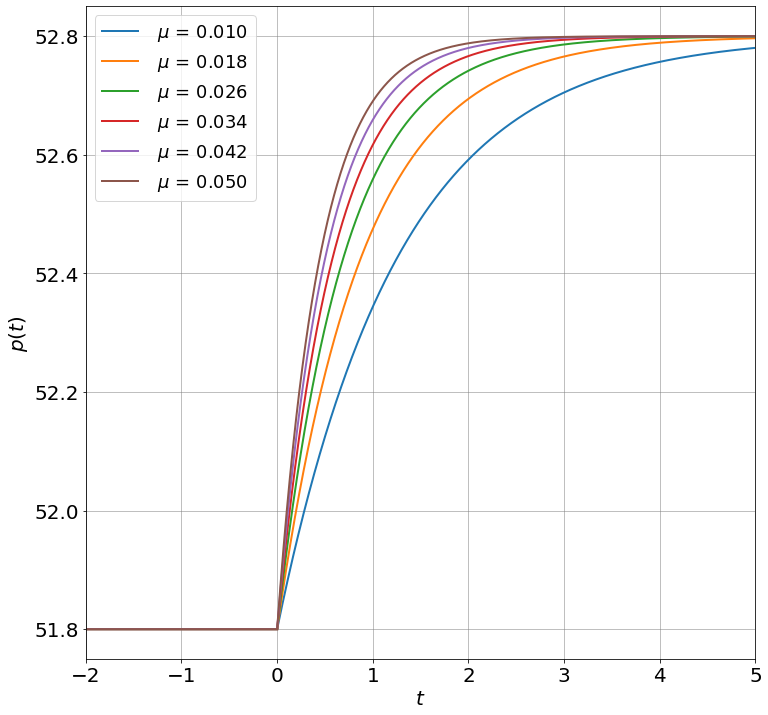

In [44]:
fig, ax = plt.subplots()
for n in np.linspace(0.01, 0.05, 6):  
  mask_start = len(t1)                                                                                     #deveria ser 51.8
  mc_1 = ma.array(p_trajetoria(t,np.linalg.eig(np.array([[-n*(b1+b2/teta), n*b1],[1/teta, 0]]))[0][0], preco_lp(m0, teta, i_ext, psi, yn), preco_lp(m1, teta, i_ext, psi, yn) ))
  mc_1[mask_start] = ma.masked
  ax.plot(t, mc_1 , label=" $\\mu$ = %.3f" % n, linewidth=2)

ax.grid(c='grey', linestyle='-', linewidth= 0.5)
plt.xlim([-2, 5])
#plt.ylim([75.5, 52.9])
ax.legend(fontsize=18)
plt.ylabel("$p(t)$", fontsize=20)
plt.xlabel("$t$", fontsize=20)
plt.savefig('variando_mi_preco.png')

<h2> Choque fiscal </h2>

<h3> Curvas sem movimento </h3>

C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\vinic\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


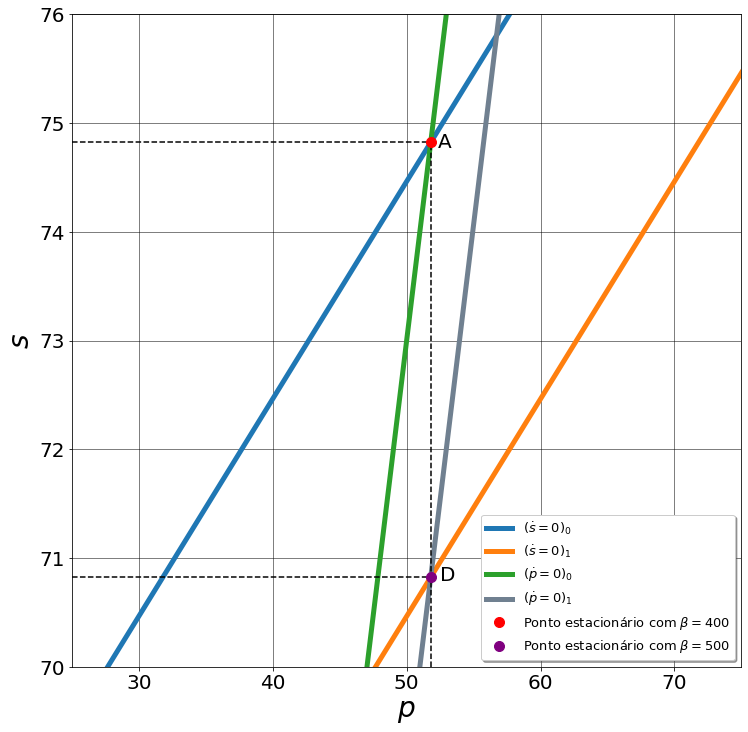

In [49]:
p_zerozada = p_zero(x_novo, b0, p_ext, b1, b2, teta, m0, yn, psi)
plt.grid(c='black', linestyle='-', linewidth=0.5)
p_zerozada_2 = p_zero(x_novo, b0_1, p_ext, b1, b2, teta, m0, yn, psi)
s_zerozada = s_zero(x_novo, m0, b0, psi, b1, i_ext, teta, b2, p_ext)
s_zerozada_2 = s_zero(x_novo, m0, b0_1, psi, b1, i_ext, teta, b2, p_ext)
plt.plot(x_novo,s_zerozada, label="$(\dot{s}=0)_0$", linewidth=5)
plt.plot(x_novo,s_zerozada_2, label="$(\dot{s}=0)_{1}$", linewidth=5)

plt.plot(x_novo,p_zerozada, label="$(\dot{p}=0)_0$", linewidth=5)

plt.plot(x_novo,p_zerozada_2, label="$(\dot{p}=0)_{1}$", color='slategray', linewidth=5)



#plt.axes().arrow(45, 71, 0.6, -1.5,width=0.01, head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.xlim([25, 75])
plt.ylim([70, 76])

#linha vertical para 
y_d = np.array(np.arange(70, 74.824,0.05))
d_vector = np.full(len(np.arange(70, 74.824,0.05)),51.8 )
plt.plot(d_vector, y_d, color='black', linestyle='dashed')

x_d = np.array(np.arange(25, 51.8+0.03,0.05))
d_vector = np.full((len(np.arange(25, 51.8+0.03,0.05))), 74.824)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

x_d = np.array(np.arange(25, 51.8+0.03,0.05))
d_vector = np.full((len(np.arange(25, 51.8+0.03,0.05))), 70.824)
plt.plot(x_d, d_vector, color='black', linestyle='dashed')

plt.plot(51.8, 74.824, 'ro', markersize=10, label="Ponto estacionário com $\\beta=400$")

plt.plot(51.8, 70.824, 'ro', markersize=10, label="Ponto estacionário com $\\beta=500$", color='purple')

plt.xlabel('$p$', fontsize=28)
plt.ylabel('$s$', fontsize=28)

plt.axes().annotate("A", xy=(51.8+0.5, 74.824-0.05), fontsize=20)
plt.axes().annotate("D", xy=(51.8+0.7, 70.824-0.03), fontsize=20)



plt.legend(loc='best', shadow=True, facecolor='white', fontsize=13)
plt.savefig('s_0_p_0_choque_fiscal.png')

<h3> As trajetórias </h3>

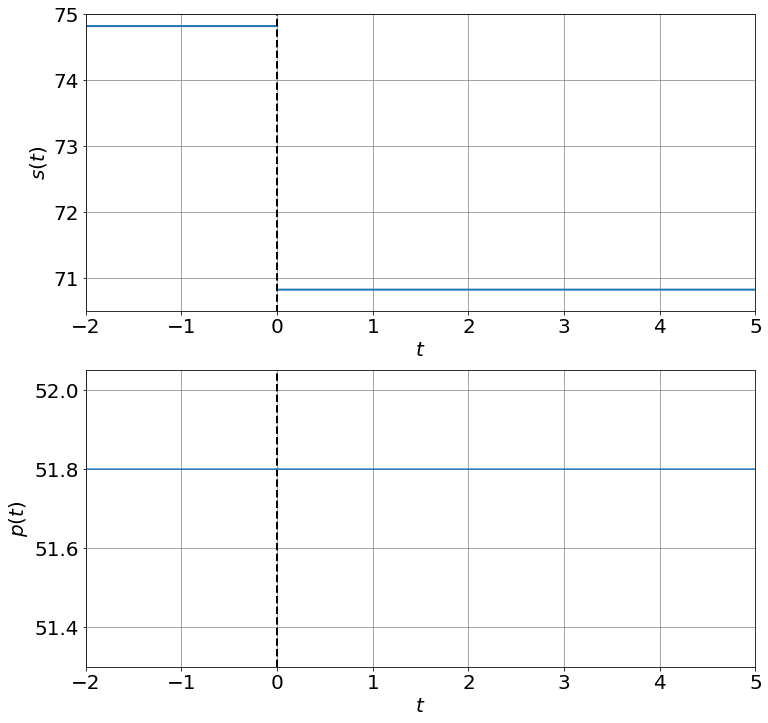

In [53]:
t1 = np.linspace(-2, 0, 500)
t2 = np.linspace(0, 5, 5000)
t = np.concatenate([t1, t2])

clp_m1_b01 = cambio_lp(b0_1, b1, p_ext, m0, teta, i_ext, yn, psi)
clp_m0 = cambio_lp(b0, b1, p_ext, m0, teta, i_ext, yn, psi)
plp_m0 = preco_lp(m0, teta, i_ext, psi, yn)

#cambio_overshootado = overshooting(m0, m1, teta, autocoisas[0][0], clp_m0)
s_caminho = s_trajetoria(t, autocoisas[0][0], clp_m1_b01, clp_m1_b01, clp_m0)
p_caminho = p_trajetoria(t, autocoisas[0][0], plp_m0, plp_m0)


mask_start = len(t1)
mc = ma.array(s_caminho)
mc[mask_start] = ma.masked



#plotando o cambio e o preco

fig, (ax1, ax2) = plt.subplots(2)


#plot do cambio
#plt.set_yticks(np.arange(min(s_caminho), max(s_caminho)+1, 0.5))
ax1.grid(c='grey', linestyle='-', linewidth= 0.7)
mask_start = len(t1)
mc_1 = ma.array(s_caminho)
mc_1[mask_start] = ma.masked


ax1.plot(t, mc_1, linewidth= 2)


y_d = np.array(np.arange(min(s_caminho)-0.5, max(s_caminho)+0.5,0.05))
d_vector = np.full(len(np.arange(min(s_caminho)-0.5, max(s_caminho)+0.5,0.05)),0 )
ax1.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)

ax1.set_xlim([-2, 5])
ax1.set_ylim([70.5, 75])
ax1.set_ylabel("$s(t)$", fontsize=20)
ax1.set_xlabel("$t$", fontsize=20)


#plot do preco

ax2.grid(c='grey', linestyle='-', linewidth= 0.7)

mask_start = len(t1)
mc_2 = ma.array(p_caminho)
mc_2[mask_start] = ma.masked
ax2.set_xlim([-2, 5])
ax2.set_ylim([51.3, 52.05])
y_d = np.array(np.arange(min(p_caminho)-0.5, max(p_caminho)+0.3,0.05))
d_vector = np.full(len(np.arange(min(p_caminho)-0.5, max(p_caminho)+0.3,0.05)),0 )
ax2.plot(d_vector, y_d, color='black', linestyle='dashed', linewidth= 2)


ax2.plot(t, mc_2)
#plt.yticks(np.arange(min(p_caminho)-0.001, max(p_caminho)+1, 0.3))
#ax2.set_title("Log do nível de preços")
ax2.set_ylabel("$p(t)$", fontsize=20)
ax2.set_xlabel("$t$", fontsize=20)
plt.savefig('caminho_p_s.png')